# Решающие деревья и случайные леса(часть 2)

**Коптев Данил**

##Задание 2

1. Вспомнить материалы лекций, изучить учебный ноутбук; разобраться с принципом разбиения вершин при построении решающего дерева (выбор признака и порогового значения для разбиения).

2. Импортировать  данные  набора House  Prices  Competition(файл house_prices.csv)  в DataFrameи вывести несколько первых записей (для контроля корректности импорта).

In [88]:
import pandas as pd

data = pd.read_csv('house_prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


3. Дальнейшие действия выполнять только для количественных признаков, отобранных ранее по результатам предварительного анализа.

  Выполнив исследование, аналогичное представленному в учебном ноутбуке, найти оптимальное разбиение корневой вершины дерева решений для задачи прогнозирования цены дома. 

  Все действия прокомментировать; выводы обосновать.Результат – признак  и  пороговое  значение  для  оптимального  разбиения,  а  также визуализация полученного разбиения

In [89]:
# Отбираем количественные признаки
data_num = data[["1stFlrSF", "OverallQual", "GrLivArea", "GarageArea", "YearBuilt", "FullBath"]] 
data_num.head()

,1stFlrSF,OverallQual,GrLivArea,GarageArea,YearBuilt,FullBath
0,856,7,1710,548,2003,2
1,1262,6,1262,460,1976,2
2,920,7,1786,608,2001,2
3,961,7,1717,642,1915,1
4,1145,8,2198,836,2000,2


In [90]:
from sklearn.model_selection import train_test_split
# Разделяем выборку
x_train, x_test, y_train, y_test = train_test_split(data_num, data['SalePrice'], random_state=25)

In [91]:
# преобразуем в DataFrame для удобства
data_train = pd.DataFrame(x_train, columns = ["1stFlrSF", "OverallQual", "GrLivArea", "GarageArea", "YearBuilt", "FullBath"])
data_test = pd.DataFrame(x_test, columns = ["1stFlrSF", "OverallQual", "GrLivArea", "GarageArea", "YearBuilt", "FullBath"])
data_train.head()

,1stFlrSF,OverallQual,GrLivArea,GarageArea,YearBuilt,FullBath
1276,735,6,1395,497,1972,1
1217,1314,8,1314,552,2009,2
1036,1620,9,1620,912,2007,2
1320,1478,6,1478,442,1957,1
80,1182,6,2142,509,1968,2


In [92]:
# Число объектов и признаков
data_train.shape

(1095, 6)

In [93]:
# Для удобной сортировки
data_train['SalePrice'] = y_train

In [94]:
# Вычисления Q для конктного разбиения
def quality(data, y, i):
  length = data. shape [0]
  Q = y[:i].var() * i/length + y[i:].var() * (1-i/length)
  return Q

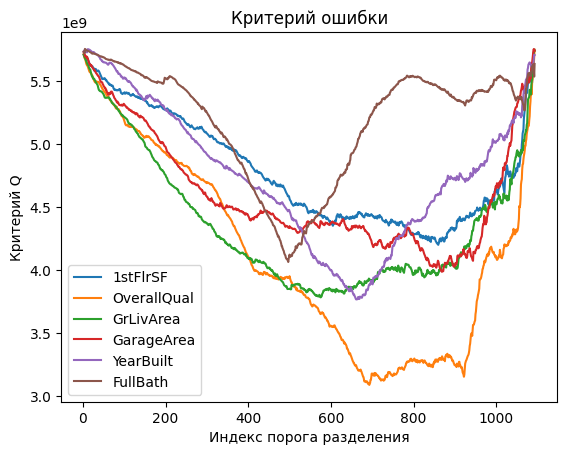

In [95]:
# Вычислим Q для каждого признака
import matplotlib.pyplot as plt 

for feat in data_train.columns[:-1]:
  data_train.sort_values(feat, inplace = True)
  y = data_train['SalePrice']
  qual = []
  for i in range(data_train.shape[0]):
    Q=quality(data_train, y, i)
    qual.append(Q)
  plt.plot(qual, label=feat)

plt.xlabel('Индекс порога разделения')
plt.ylabel('Критерий Q')
plt.title('Критерий ошибки')
plt.legend()

OverallQual - признак с самым лучшим разбиением. Выведим его отдельно.

Text(0.5, 1.0, 'Критерий ошибки для признака OverallQual')

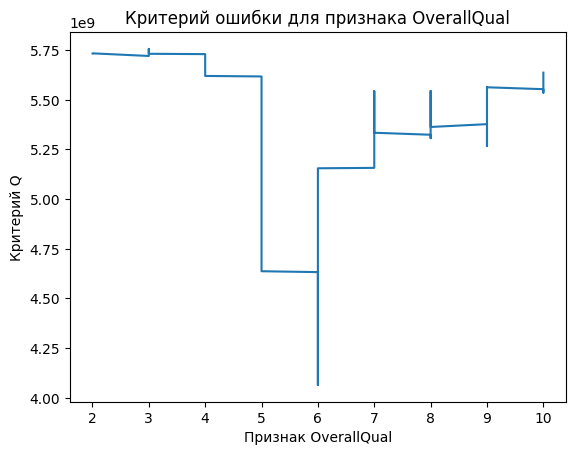

In [96]:
data_train.sort_values('OverallQual', inplace = True)
quals = [] 
for i in range(data_train.shape[0]): 
  quals.append(quality(data_train, y, i))
plt.plot(data_train['OverallQual'], quals)
plt.xlabel('Признак OverallQual')
plt.ylabel('Критерий Q')
plt.title('Критерий ошибки для признака OverallQual')

Найдем оптимальную величину порога

In [97]:
import numpy as np

theshold_opimal = data_train['OverallQual'].values[~np.isnan(qual)]
qual = np.array(qual)[~np.isnan(qual)]
threshold = theshold_opimal[np.argmin(qual)]
print("Оптимальный порог: ", threshold)

Оптимальный порог:  6


Изобразим OverallQual и SalePrice

Text(0.5, 1.0, 'Обучающая выборка')

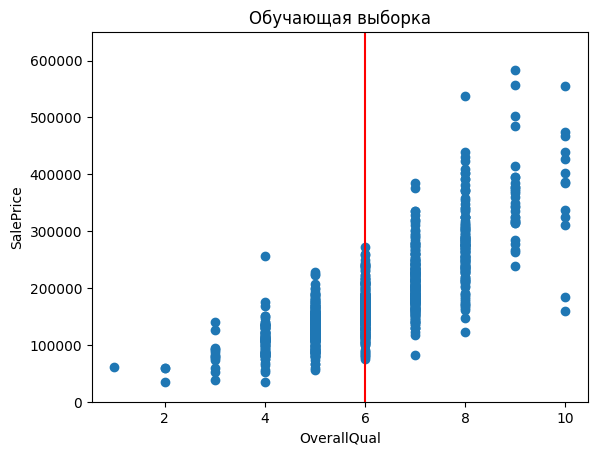

In [98]:
plt.scatter(data_train['OverallQual'], data_train['SalePrice'])
plt.ylim(0,650000)
plt.vlines(threshold, 0 , 650000, color = 'red')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Обучающая выборка')

Видно, что большинство точек справа от красной линии лежит больше чем, с слева, то есть этот признак действительно хорошо разделяет выборку


4. Импортировать  данные  клиентов  банка  (файл scoring.csv)  в DataFrameи  вывести несколько первых записей (для контроля корректности импорта).

5. Выполнив  исследование,  аналогичное  представленному  в  учебном  ноутбуке (использовать  только  количественные  признаки),  найти  оптимальное  разбиение корневой вершины дерева решений для задачи кредитного скоринга. 
  
  Обратите внимание: это задача классификации, а не регрессии, поэтому должен использоваться другой критерий информативности. Найти оптимальное разбиение как для энтропийного критерия, так и для критерия Джини. 
  
  Сравнить полученные результаты.Все действия прокомментировать; выводы обосновать.Результат –признак  и  пороговое  значение  для  оптимального  разбиения,  а  также визуализация полученного разбиения

In [99]:
# Импортируем данные
data_scoring = pd.read_csv('scoring.csv', sep = ';')
data_scoring.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,education,0


In [100]:
# Отделяем количественные данные
data_num = data_scoring.select_dtypes(include='number')

# Формируем тестовую и тренировочную выборку
target = data_num['target']
data_num = data_num.drop('target', axis=1)
x_train, x_test, y_train, y_test = train_test_split(data_num, target, random_state=42)

# Для удобства сортировки
data_train = pd.DataFrame(x_train)
data_train['target'] = y_train

**Джини**

In [101]:
# Вычисляем критерий Джини для задачи классификации
def gini_score(data):
  request = 0
  for value in set(data):
    count = np.count_nonzero(data == value)
    request += (count / len(data)) * (1 - (count / len(data)))
  return request

# Вычисляет критерий Джини для данных по столбцу
def get_quality(data, feature, name_target, score = gini_score, sort = True):
  quality = []
  sorted_data = data
  if sort:
    sorted_data = data.sort_values(feature)
  else:
    data.sort_values(feat, inplace=True)
    sorted_data = data
  for i in range(sorted_data.shape[0]):
    left_data = sorted_data.iloc[:i]
    right_data = sorted_data.iloc[i:]
    left_g = gini_score(left_data[name_target])
    right_g = gini_score(right_data[name_target])
    quality.append((left_g * i / sorted_data.shape[0]) + right_g * (1 - i / sorted_data.shape[0]))
  return quality

Построим график критерия Джини

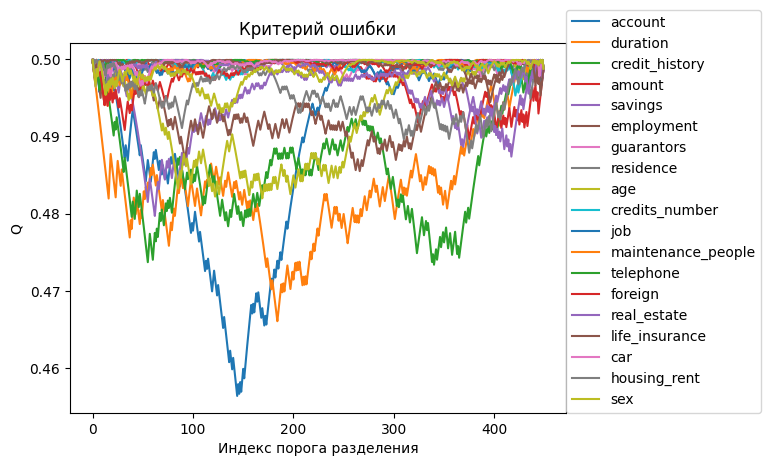

In [102]:
# проходимся по каждому столбцу данных в data_train, кроме последнего столбца, так как там target
for feature in data_train.columns[:-1]:
  quality = get_quality(data_train, feature, "target")
  plt.plot(quality, label=feature)
    
plt.title("Критерий ошибки")
plt.xlabel("Индекс порога разделения")
plt.ylabel("Q")
plt.legend(loc = (1,0))

Наилучшее разбиение получается с признаком account. Изобразим отдельно.

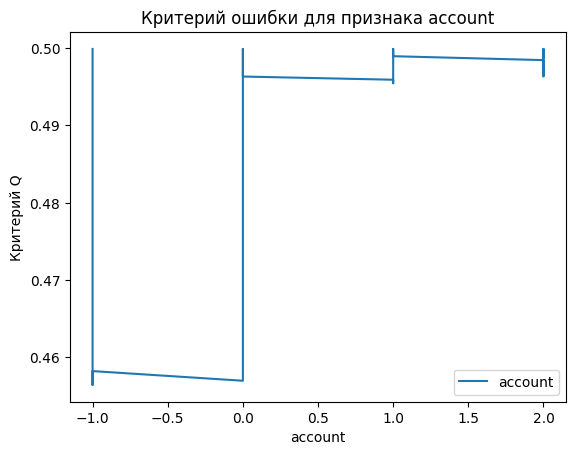

In [103]:
feat = "account"
quality = get_quality(data_train, feat, "target", score = gini_score, sort = False)
plt.plot(data_train[feat], quality, label=feat)
plt.xlabel('account')
plt.ylabel('Критерий Q')
plt.title('Критерий ошибки для признака account')
plt.legend()

Оптимальная величина порога по критерию Джини 

In [104]:
theshold_opimal = data_train['account'].values[~np.isnan(quality)]
quality = np.array(quality)[~np.isnan(quality)]
threshold = theshold_opimal[np.argmin(quality)]
print(f"Оптимальный порог разбиения: {threshold}")

Оптимальный порог разбиения: -1


Данный график показывает, что отрицательный баланс негативно влияет на ответ по выдачу кредита, что логично. Я считаю, что признак хорошо разделяет выборку.

**Энтропия**

In [105]:
import math

# Функция расчета Энтропии
def entrop(data):
    result = 0
    for value in set(data):
        count = np.count_nonzero(data == value)
        result += (count / len(data)) * ( math.log(count / len(data)))
    return result * -1

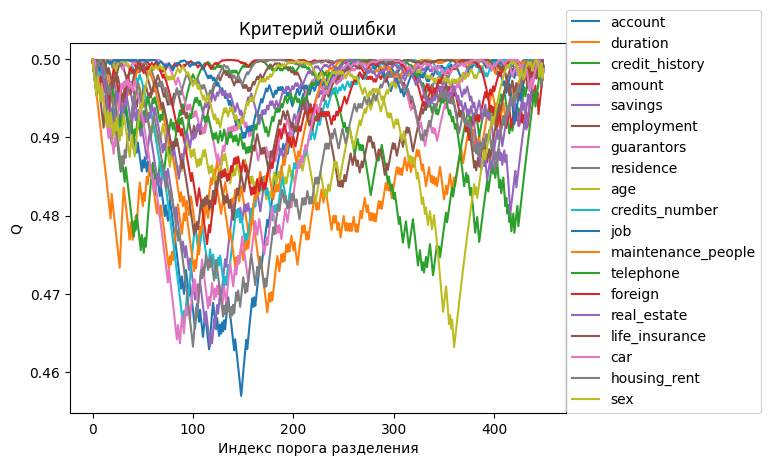

In [106]:
# проходимся по каждому столбцу данных в data_train, кроме последнего столбца
for feature in data_train.columns[:-1]:
  quality = get_quality(data_train, feature, "target", score=entrop)
  plt.plot(quality, label=feature)
    
plt.title("Критерий ошибки")
plt.xlabel("Индекс порога разделения")
plt.ylabel("Q")
plt.legend(loc = (1,0))

Наилучшее разбиение получается с признаком account. Изобразим отдельно.

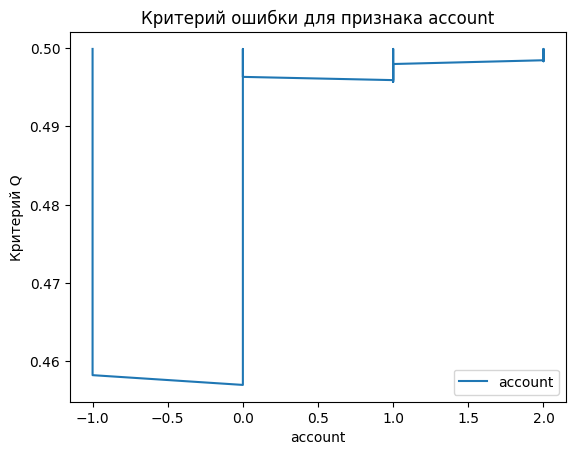

In [107]:
feat = "account"
quality = get_quality(data_train, feat, "target", score = entrop, sort = False)
plt.plot(data_train[feat], quality, label=feat)
plt.xlabel('account')
plt.ylabel('Критерий Q')
plt.title('Критерий ошибки для признака account')
plt.legend()

Найдем опитмальный порог разбиения

In [108]:
theshold_opimal = data_train['account'].values[~np.isnan(quality)]
quality = np.array(quality)[~np.isnan(quality)]
threshold = theshold_opimal[np.argmin(quality)]
print(f"Оптимальный порог разбиения: {threshold}")

Оптимальный порог разбиения: 0


Выводы аналогичные как и с критерием Джини

По итогу, account был признан лучшим признакам по обоим критериям, но оптимальны порого отличается
